In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('/content/Dataset .csv')

In [3]:
df = pd.DataFrame(data)

## Preprocessing

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
# Fill missing 'Cuisines' with 'Unknown'
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

In [9]:
# Encode Yes/No columns
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Is delivering now'] = df['Is delivering now'].map({'Yes': 1, 'No': 0})

In [10]:
# Drop columns not needed for content-based
drop_cols = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose',
             'Longitude', 'Latitude', 'Currency', 'Switch to order menu', 'Rating color', 'Rating text']
df_clean = df.drop(drop_cols, axis=1)

## Outlier Detection & Treatment

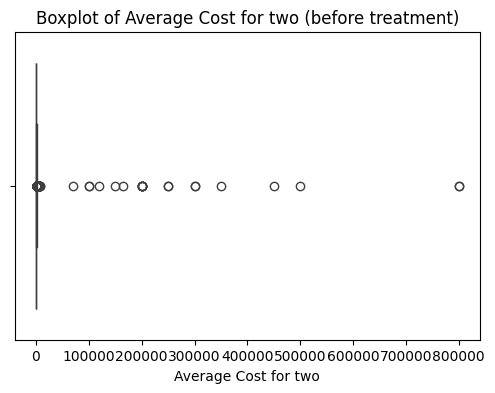

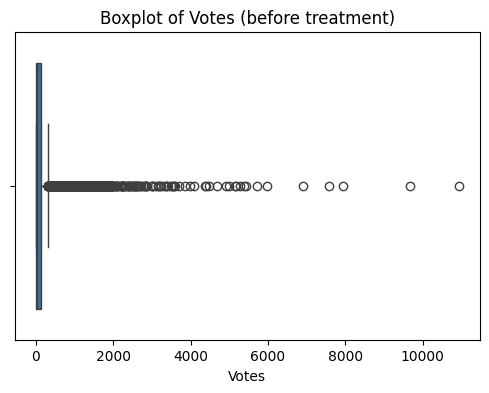

In [11]:
# Visualize boxplots before treatment
for col in ['Average Cost for two', 'Votes']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot of {col} (before treatment)')
    plt.show()

In [12]:
# Outlier treatment using IQR
for col in ['Average Cost for two', 'Votes']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean[col] = np.where(df_clean[col] > upper, upper,
                             np.where(df_clean[col] < lower, lower, df_clean[col]))

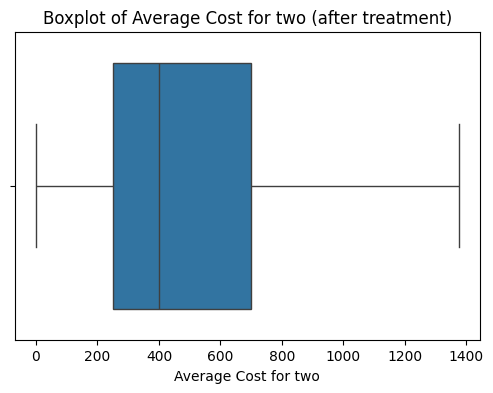

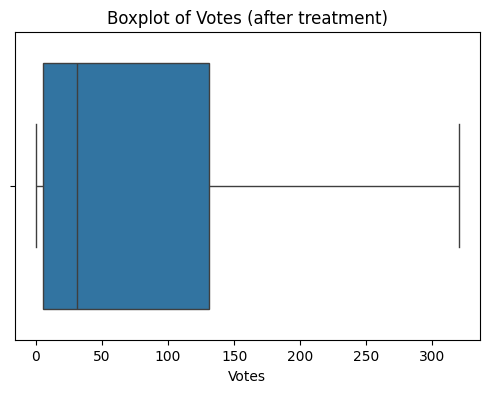

In [13]:
# Visualize after treatment
for col in ['Average Cost for two', 'Votes']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot of {col} (after treatment)')
    plt.show()

##  Feature Scaling

In [14]:
scaler = MinMaxScaler()

In [15]:
df_clean[['Average Cost for two', 'Aggregate rating', 'Votes']] = scaler.fit_transform(
    df_clean[['Average Cost for two', 'Aggregate rating', 'Votes']]
)

In [16]:
# Encode Cuisine using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_clean['Cuisines'])

In [17]:
# Combine Cuisine similarity with numeric features
# Create a numeric feature matrix
numeric_features = df_clean[['Average Cost for two', 'Aggregate rating', 'Votes',
                             'Price range', 'Has Table booking', 'Has Online delivery', 'Is delivering now']].values

In [18]:
# Normalize numeric features separately
numeric_features = scaler.fit_transform(numeric_features)

In [19]:
# Compute cosine similarity for cuisine
cuisine_similarity = cosine_similarity(tfidf_matrix)

In [20]:
# Final combined similarity (only cuisine for content-based)
final_similarity = cuisine_similarity

## Sample User Preference & Recommendation

In [21]:
# Function to get top N similar restaurants to a given index
def recommend_restaurants(index, top_n=5):
    sim_scores = list(enumerate(final_similarity[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    restaurant_indices = [i[0] for i in sim_scores]
    return df[['Restaurant Name', 'Cuisines', 'City', 'Average Cost for two', 'Aggregate rating', 'Votes']].iloc[restaurant_indices]

In [22]:
# Example: Pick a restaurant index to simulate user preference
user_index = 10
print("User's chosen restaurant:\n")
print(df[['Restaurant Name', 'Cuisines', 'City']].iloc[user_index])


User's chosen restaurant:

Restaurant Name     Silantro Fil-Mex
Cuisines           Filipino, Mexican
City                      Pasig City
Name: 10, dtype: object


In [23]:
print("\nTop recommended restaurants:\n")
print(recommend_restaurants(user_index, top_n=5))


Top recommended restaurants:

     Restaurant Name                           Cuisines           City  \
12  Silantro Fil-Mex                  Filipino, Mexican    Quezon City   
9           Locavore                           Filipino     Pasig City   
13        Guevarra's                           Filipino  San Juan City   
17        Balay Dako                           Filipino  Tagaytay City   
15     Cafe Arabelle  Cafe, American, Italian, Filipino     Santa Rosa   

    Average Cost for two  Aggregate rating  Votes  
12                   800               4.8    294  
9                   1100               4.8    532  
13                  1000               4.2    458  
17                  1200               4.5    211  
15                   800               3.6     29  


## Visualizations & Insights

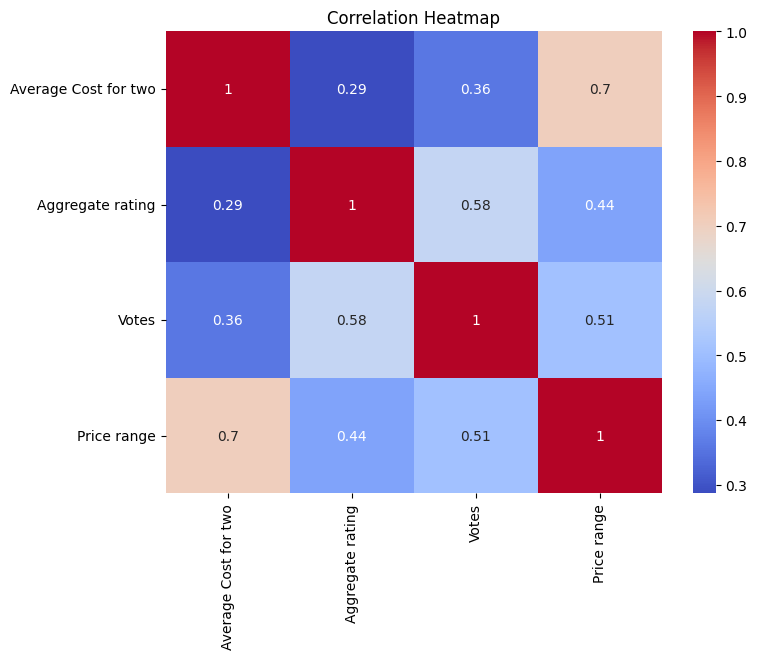

In [24]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[['Average Cost for two', 'Aggregate rating', 'Votes', 'Price range']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

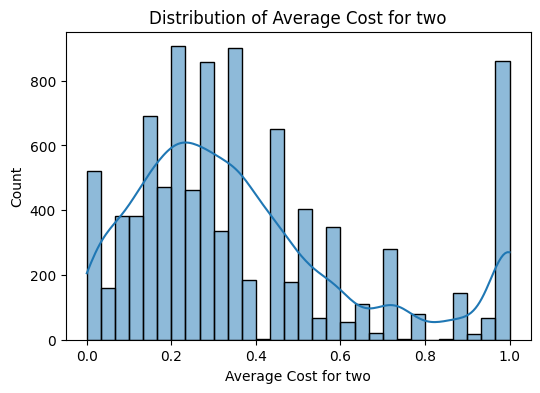

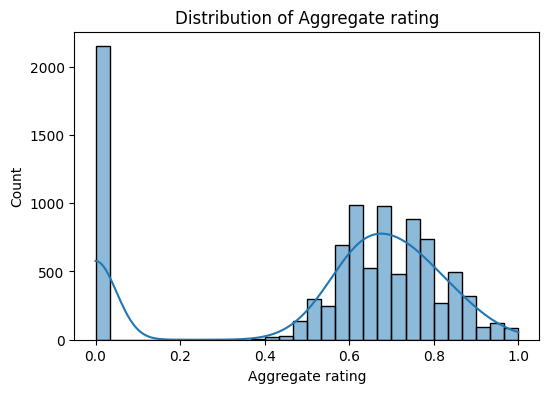

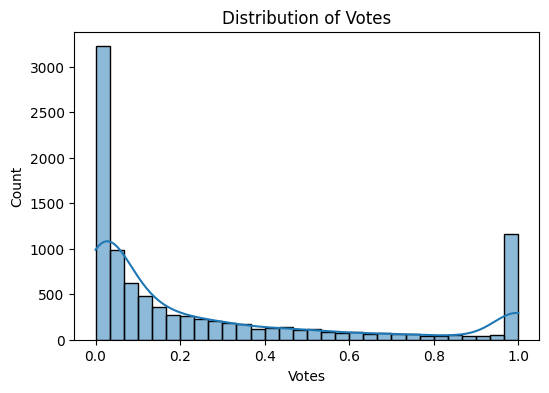

In [25]:
# Distribution plots
for col in ['Average Cost for two', 'Aggregate rating', 'Votes']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_clean[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## Insights:
* Higher aggregate ratings are slightly correlated with votes.
* Average cost and price range are moderately correlated.
* Outlier treatment helped reduce extreme cost and votes, making similarity scores more balanced.